<a href="https://colab.research.google.com/github/SNMHZ/finedust_predict/blob/master/%EB%AF%B8%EC%84%B8%EB%A8%BC%EC%A7%80_0117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 / 데이터 로드

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
#2003년도부터 2017년도까지 미세먼지 데이터 로딩
DUST_DF_DICT={}
for i in range(15):
  DUST_DF_DICT['DUST_%d'%(i+2003)]=pd.read_csv('https://github.com/SNMHZ/finedust_predict/raw/master/dataset/%d.csv'%(i+2003), encoding='EUC_KR')

# 우리가 얻은 미세먼지 데이터 상태

In [4]:
DUST_DF_DICT['DUST_2017'].columns

Index(['측정소명', '년', '월', '일', '시', 'SO2', 'PM10', 'PM25', 'O3', 'NO2', 'CO'], dtype='object')

In [5]:
DUST_DF_DICT['DUST_2017']

,측정소명,년,월,일,시,SO2,PM10,PM25,O3,NO2,CO
0,수창동,2017,1,1,1,0.005,65,45,0.001,0.038,0.9
1,지산동,2017,1,1,1,0.003,41,30,0.004,0.054,0.6
2,서호동,2017,1,1,1,0.007,52,31,0.002,0.044,1.1
3,이현동,2017,1,1,1,0.004,56,33,0.002,0.039,0.7
4,대명동,2017,1,1,1,0.004,57,38,0.001,0.038,0.7
...,...,...,...,...,...,...,...,...,...,...,...
96474,만촌동,2017,12,31,24,0.005,45,17,0.023,0.019,0.5
96475,호림동,2017,12,31,24,0.004,53,11,0.030,0.008,0.4
96476,현풍면,2017,12,31,24,0.002,47,9,0.032,0.008,0.3
96477,시지동,2017,12,31,24,0.001,1,1,0.026,0.015,0.1


In [6]:
m_dict={}
for name in DUST_DF_DICT['DUST_2017']['측정소명']:
  m_dict[name]=0

In [7]:
m_dict.keys()

dict_keys(['수창동', '지산동', '서호동', '이현동', '대명동', '노원동', '신암동', '태전동', '만촌동', '호림동', '현풍면', '시지동', '진천동'])

In [8]:
len(m_dict.keys())

13

# 대기인자와 미세먼지 상관관계 확인하기. 피어슨 상관계수 도출.

## 함수 만들기(전처리 작업한 것. 중요X)

In [109]:
def extractDataset(yearDF, townName):
  dustDF = yearDF.copy()
  dustDF = dustDF.loc[dustDF['측정소명'].where(dustDF['측정소명']==townName).dropna().index]
  dustDF['PM10_res'] = dustDF['PM10'].shift(-1)
  dustDF['PM25_res'] = dustDF['PM25'].shift(-1)
  dustDF = dustDF[:-1]
  return dustDF#[['SO2',	'PM10',	'PM25',	'O3',	'NO2', 	'CO',	'PM10_res']]

In [10]:
extractDataset(DUST_DF_DICT['DUST_2017'], '수창동')

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,0.005,65,45,0.001,0.038,0.9,63.0
11,0.005,63,43,0.002,0.035,0.9,64.0
22,0.006,64,50,0.001,0.034,1.0,68.0
33,0.005,68,53,0.001,0.032,0.9,82.0
44,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...
96401,0.003,76,17,0.020,0.018,0.4,74.0
96414,0.004,74,20,0.018,0.018,0.4,62.0
96427,0.003,62,19,0.016,0.021,0.5,59.0
96440,0.004,59,18,0.020,0.015,0.4,54.0


In [11]:
extractDataset(DUST_DF_DICT['DUST_2017'], '수창동')

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,0.005,65,45,0.001,0.038,0.9,63.0
11,0.005,63,43,0.002,0.035,0.9,64.0
22,0.006,64,50,0.001,0.034,1.0,68.0
33,0.005,68,53,0.001,0.032,0.9,82.0
44,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...
96401,0.003,76,17,0.020,0.018,0.4,74.0
96414,0.004,74,20,0.018,0.018,0.4,62.0
96427,0.003,62,19,0.016,0.021,0.5,59.0
96440,0.004,59,18,0.020,0.015,0.4,54.0


In [12]:
m_dict.keys()

dict_keys(['수창동', '지산동', '서호동', '이현동', '대명동', '노원동', '신암동', '태전동', '만촌동', '호림동', '현풍면', '시지동', '진천동'])

In [13]:
dust2017=DUST_DF_DICT['DUST_2017'].copy()

In [14]:
suchangdong=dust2017.loc[dust2017['측정소명'].where(dust2017['측정소명']=='수창동').dropna().index]

In [15]:
suchangdong

,측정소명,년,월,일,시,SO2,PM10,PM25,O3,NO2,CO
0,수창동,2017,1,1,1,0.005,65,45,0.001,0.038,0.9
11,수창동,2017,1,1,2,0.005,63,43,0.002,0.035,0.9
22,수창동,2017,1,1,3,0.006,64,50,0.001,0.034,1.0
33,수창동,2017,1,1,4,0.005,68,53,0.001,0.032,0.9
44,수창동,2017,1,1,5,0.008,82,64,0.002,0.031,1.3
...,...,...,...,...,...,...,...,...,...,...,...
96414,수창동,2017,12,31,20,0.004,74,20,0.018,0.018,0.4
96427,수창동,2017,12,31,21,0.003,62,19,0.016,0.021,0.5
96440,수창동,2017,12,31,22,0.004,59,18,0.020,0.015,0.4
96453,수창동,2017,12,31,23,0.004,54,18,0.018,0.015,0.4


In [16]:
suchangdong['PM10_res']=suchangdong['PM10'].shift(-1)
suchangdong

,측정소명,년,월,일,시,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,수창동,2017,1,1,1,0.005,65,45,0.001,0.038,0.9,63.0
11,수창동,2017,1,1,2,0.005,63,43,0.002,0.035,0.9,64.0
22,수창동,2017,1,1,3,0.006,64,50,0.001,0.034,1.0,68.0
33,수창동,2017,1,1,4,0.005,68,53,0.001,0.032,0.9,82.0
44,수창동,2017,1,1,5,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...
96414,수창동,2017,12,31,20,0.004,74,20,0.018,0.018,0.4,62.0
96427,수창동,2017,12,31,21,0.003,62,19,0.016,0.021,0.5,59.0
96440,수창동,2017,12,31,22,0.004,59,18,0.020,0.015,0.4,54.0
96453,수창동,2017,12,31,23,0.004,54,18,0.018,0.015,0.4,47.0


In [17]:
suchangdong=suchangdong[:-1]
suchangdong

,측정소명,년,월,일,시,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,수창동,2017,1,1,1,0.005,65,45,0.001,0.038,0.9,63.0
11,수창동,2017,1,1,2,0.005,63,43,0.002,0.035,0.9,64.0
22,수창동,2017,1,1,3,0.006,64,50,0.001,0.034,1.0,68.0
33,수창동,2017,1,1,4,0.005,68,53,0.001,0.032,0.9,82.0
44,수창동,2017,1,1,5,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...
96401,수창동,2017,12,31,19,0.003,76,17,0.020,0.018,0.4,74.0
96414,수창동,2017,12,31,20,0.004,74,20,0.018,0.018,0.4,62.0
96427,수창동,2017,12,31,21,0.003,62,19,0.016,0.021,0.5,59.0
96440,수창동,2017,12,31,22,0.004,59,18,0.020,0.015,0.4,54.0


In [18]:
suchangdong.columns[5:]

Index(['SO2', 'PM10', 'PM25', 'O3', 'NO2', 'CO', 'PM10_res'], dtype='object')

In [19]:
suchangdong_drop=suchangdong[suchangdong.columns[5:]]
suchangdong_drop

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,0.005,65,45,0.001,0.038,0.9,63.0
11,0.005,63,43,0.002,0.035,0.9,64.0
22,0.006,64,50,0.001,0.034,1.0,68.0
33,0.005,68,53,0.001,0.032,0.9,82.0
44,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...
96401,0.003,76,17,0.020,0.018,0.4,74.0
96414,0.004,74,20,0.018,0.018,0.4,62.0
96427,0.003,62,19,0.016,0.021,0.5,59.0
96440,0.004,59,18,0.020,0.015,0.4,54.0


In [20]:
suchangdong_drop.corr(method='pearson')

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
SO2,1.000000,0.304133,0.273105,-0.344421,0.676843,0.669121,0.320853
PM10,0.304133,1.000000,0.791031,0.005717,0.286660,0.299287,0.340913
PM25,0.273105,0.791031,1.000000,-0.073717,0.281354,0.287920,0.291834
O3,-0.344421,0.005717,-0.073717,1.000000,-0.588629,-0.359648,-0.034588
NO2,0.676843,0.286660,0.281354,-0.588629,1.000000,0.716747,0.312683
CO,0.669121,0.299287,0.287920,-0.359648,0.716747,1.000000,0.319632
PM10_res,0.320853,0.340913,0.291834,-0.034588,0.312683,0.319632,1.000000


In [21]:
def dong_checker(dust, dong_name):
  dust2017=dust.copy()
  suchangdong=dust2017.loc[dust2017['측정소명'].where(dust2017['측정소명']==dong_name).dropna().index]
  suchangdong['PM10_res']=suchangdong['PM10'].shift(-1)
  suchangdong=suchangdong[:-1]
  suchangdong_drop=suchangdong[suchangdong.columns[5:]]
  return suchangdong_drop.corr(method='pearson')

## 동 개별로 찍어서 상관계수 확인(한개씩. 동마다 좀 다르다.)

In [22]:
dong_checker(DUST_DF_DICT['DUST_2017'], '태전동')

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
SO2,1.000000,0.146872,0.155635,0.013242,0.431721,0.530121,0.156603
PM10,0.146872,1.000000,0.476055,0.027750,0.125615,0.154781,0.338011
PM25,0.155635,0.476055,1.000000,-0.018025,0.184733,0.236334,0.149626
O3,0.013242,0.027750,-0.018025,1.000000,-0.554123,-0.403631,0.020452
NO2,0.431721,0.125615,0.184733,-0.554123,1.000000,0.769499,0.145260
CO,0.530121,0.154781,0.236334,-0.403631,0.769499,1.000000,0.176030
PM10_res,0.156603,0.338011,0.149626,0.020452,0.145260,0.176030,1.000000


In [23]:
dong_checker(DUST_DF_DICT['DUST_2017'], '노원동')

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
SO2,1.000000,0.472934,0.228456,-0.072785,0.401739,0.607318,0.495592
PM10,0.472934,1.000000,0.351670,-0.012805,0.447778,0.588282,0.885056
PM25,0.228456,0.351670,1.000000,-0.040524,0.210865,0.280907,0.330606
O3,-0.072785,-0.012805,-0.040524,1.000000,-0.564915,-0.285928,-0.053868
NO2,0.401739,0.447778,0.210865,-0.564915,1.000000,0.680052,0.499470
CO,0.607318,0.588282,0.280907,-0.285928,0.680052,1.000000,0.637043
PM10_res,0.495592,0.885056,0.330606,-0.053868,0.499470,0.637043,1.000000


In [24]:
dong_checker(DUST_DF_DICT['DUST_2017'], '대명동')

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
SO2,1.000000,0.132951,0.229272,-0.196500,0.525908,0.774948,0.141657
PM10,0.132951,1.000000,0.363267,0.008376,0.134527,0.146021,0.655739
PM25,0.229272,0.363267,1.000000,-0.092647,0.294275,0.263129,0.188327
O3,-0.196500,0.008376,-0.092647,1.000000,-0.520902,-0.312657,-0.000471
NO2,0.525908,0.134527,0.294275,-0.520902,1.000000,0.668085,0.152873
CO,0.774948,0.146021,0.263129,-0.312657,0.668085,1.000000,0.161354
PM10_res,0.141657,0.655739,0.188327,-0.000471,0.152873,0.161354,1.000000


In [25]:
dong_checker(DUST_DF_DICT['DUST_2017'], '만촌동')

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
SO2,1.000000,0.199181,0.104894,-0.100235,0.491575,0.451863,0.209631
PM10,0.199181,1.000000,0.423425,0.062727,0.305268,0.313873,0.370190
PM25,0.104894,0.423425,1.000000,-0.021400,0.144702,0.172162,0.133291
O3,-0.100235,0.062727,-0.021400,1.000000,-0.505179,-0.339215,0.030702
NO2,0.491575,0.305268,0.144702,-0.505179,1.000000,0.751695,0.331745
CO,0.451863,0.313873,0.172162,-0.339215,0.751695,1.000000,0.336684
PM10_res,0.209631,0.370190,0.133291,0.030702,0.331745,0.336684,1.000000


## ☆★모든 동에 대해 상관계수 확인(전체) -> 동마다 다 상관계수가 다르게 나온다.. ★☆

In [26]:
pearson_dict={}
for name in m_dict.keys():
  pearson_dict[name]=dong_checker(DUST_DF_DICT['DUST_2017'], name)

In [27]:
for name in m_dict.keys():
  print(name)
  print(pearson_dict[name]['PM10_res'])
  print()
  print()

수창동
SO2         0.320853
PM10        0.340913
PM25        0.291834
O3         -0.034588
NO2         0.312683
CO          0.319632
PM10_res    1.000000
Name: PM10_res, dtype: float64


지산동
SO2         0.087492
PM10        0.432328
PM25        0.181844
O3          0.081411
NO2         0.336261
CO          0.087051
PM10_res    1.000000
Name: PM10_res, dtype: float64


서호동
SO2         0.155632
PM10        0.458647
PM25        0.080280
O3         -0.032607
NO2         0.178931
CO          0.167269
PM10_res    1.000000
Name: PM10_res, dtype: float64


이현동
SO2         0.357734
PM10        0.535670
PM25        0.369984
O3         -0.088979
NO2         0.381762
CO          0.344235
PM10_res    1.000000
Name: PM10_res, dtype: float64


대명동
SO2         0.141657
PM10        0.655739
PM25        0.188327
O3         -0.000471
NO2         0.152873
CO          0.161354
PM10_res    1.000000
Name: PM10_res, dtype: float64


노원동
SO2         0.495592
PM10        0.885056
PM25        0.330606
O3         -0

## 동별로 매칭한 데이터 이어 붙여서 상관관계 파악

### concat test(전처리 작업. 중요X)

In [28]:
def dong_df_maker(dust, dong_name):
  dust2017=dust.copy()
  suchangdong=dust2017.loc[dust2017['측정소명'].where(dust2017['측정소명']==dong_name).dropna().index]
  suchangdong['PM10_res']=suchangdong['PM10'].shift(-1)
  suchangdong=suchangdong[:-1]
  suchangdong_drop=suchangdong[suchangdong.columns[5:]]
  return suchangdong_drop

In [29]:
testd1=dong_df_maker(DUST_DF_DICT['DUST_2017'], '수창동')
testd2=dong_df_maker(DUST_DF_DICT['DUST_2017'], '태전동')

In [30]:
testd1

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,0.005,65,45,0.001,0.038,0.9,63.0
11,0.005,63,43,0.002,0.035,0.9,64.0
22,0.006,64,50,0.001,0.034,1.0,68.0
33,0.005,68,53,0.001,0.032,0.9,82.0
44,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...
96401,0.003,76,17,0.020,0.018,0.4,74.0
96414,0.004,74,20,0.018,0.018,0.4,62.0
96427,0.003,62,19,0.016,0.021,0.5,59.0
96440,0.004,59,18,0.020,0.015,0.4,54.0


In [31]:
testd2

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
7,0.004,65,37,0.001,0.038,1.0,59.0
18,0.004,59,38,0.001,0.036,1.0,78.0
29,0.004,78,48,0.001,0.032,0.9,62.0
40,0.003,62,40,0.001,0.028,0.9,60.0
51,0.004,60,38,0.001,0.028,0.9,56.0
...,...,...,...,...,...,...,...
96408,0.004,83,19,0.031,0.013,0.5,76.0
96421,0.004,76,19,0.026,0.017,0.6,66.0
96434,0.005,66,19,0.025,0.018,0.6,68.0
96447,0.005,68,16,0.018,0.027,0.6,68.0


In [32]:
pd.concat([testd1, testd2])

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,0.005,65,45,0.001,0.038,0.9,63.0
11,0.005,63,43,0.002,0.035,0.9,64.0
22,0.006,64,50,0.001,0.034,1.0,68.0
33,0.005,68,53,0.001,0.032,0.9,82.0
44,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...
96408,0.004,83,19,0.031,0.013,0.5,76.0
96421,0.004,76,19,0.026,0.017,0.6,66.0
96434,0.005,66,19,0.025,0.018,0.6,68.0
96447,0.005,68,16,0.018,0.027,0.6,68.0


### ☆★매칭된 데이터셋 생성 및 전부 합쳐서 상관계수 확인★☆

In [33]:
dong_dfs=[]
for name in m_dict.keys():
  dong_dfs.append( dong_df_maker(DUST_DF_DICT['DUST_2017'], name) )

In [34]:
pd.concat(dong_dfs)

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,0.005,65,45,0.001,0.038,0.9,63.0
11,0.005,63,43,0.002,0.035,0.9,64.0
22,0.006,64,50,0.001,0.034,1.0,68.0
33,0.005,68,53,0.001,0.032,0.9,82.0
44,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...
96413,0.001,0,0,0.028,0.019,0.0,0.0
96426,0.001,0,0,0.030,0.016,0.0,0.0
96439,0.002,0,0,0.034,0.012,0.0,0.0
96452,0.002,0,0,0.033,0.012,0.0,0.0


In [35]:
pd.concat(dong_dfs).corr(method='pearson')

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
SO2,1.000000,0.172406,0.116828,-0.064815,0.355324,0.546804,0.177915
PM10,0.172406,1.000000,0.458797,0.019781,0.242918,0.157483,0.500013
PM25,0.116828,0.458797,1.000000,-0.034795,0.183405,0.135775,0.175638
O3,-0.064815,0.019781,-0.034795,1.000000,-0.514997,-0.167912,0.000235
NO2,0.355324,0.242918,0.183405,-0.514997,1.000000,0.399886,0.262418
CO,0.546804,0.157483,0.135775,-0.167912,0.399886,1.000000,0.194003
PM10_res,0.177915,0.500013,0.175638,0.000235,0.262418,0.194003,1.000000


# 단순 선형회귀

## 2017년

In [44]:
import matplotlib.pyplot as plt

In [ ]:
def drop_outlier(columnName, start, end)

In [110]:
tdf = extractDataset(DUST_DF_DICT['DUST_2017'], '신암동')

In [54]:
DUST_DF_DICT['DUST_2017']['측정소명'].value_counts()#.index

Index(['노원동', '현풍면', '만촌동', '이현동', '신암동', '수창동', '지산동', '태전동', '서호동', '대명동',
       '호림동', '시지동', '진천동'],
      dtype='object')

In [111]:
tdf

,측정소명,년,월,일,시,SO2,PM10,PM25,O3,NO2,CO,PM10_res,PM25_res
6,신암동,2017,1,1,1,0.003,50,30,0.002,0.037,0.9,46.0,31.0
17,신암동,2017,1,1,2,0.003,46,31,0.002,0.034,0.8,40.0,29.0
28,신암동,2017,1,1,3,0.002,40,29,0.002,0.031,0.7,40.0,27.0
39,신암동,2017,1,1,4,0.002,40,27,0.002,0.030,0.8,37.0,29.0
50,신암동,2017,1,1,5,0.004,37,29,0.002,0.029,0.9,45.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96407,신암동,2017,12,31,19,0.004,66,18,0.034,0.014,0.4,62.0,20.0
96420,신암동,2017,12,31,20,0.004,62,20,0.029,0.017,0.4,55.0,22.0
96433,신암동,2017,12,31,21,0.004,55,22,0.030,0.016,0.4,54.0,16.0
96446,신암동,2017,12,31,22,0.005,54,16,0.023,0.023,0.4,56.0,19.0


### PM10

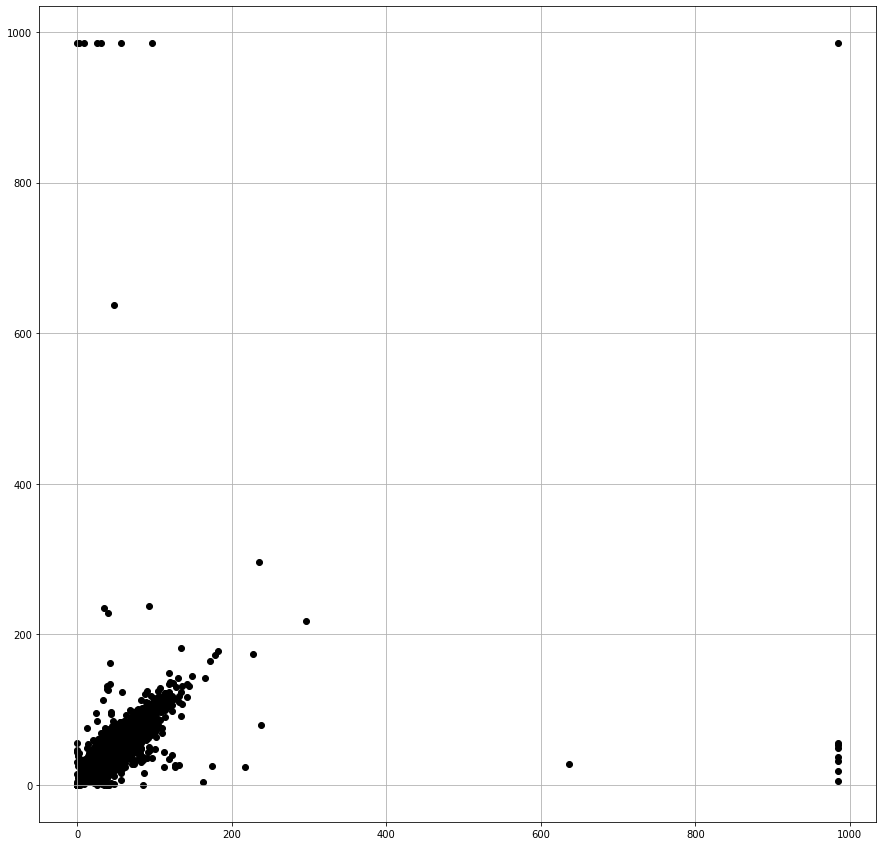

In [114]:
plt.figure(figsize=(15, 15))
plt.grid(True)
plt.scatter(tdf['PM10'], tdf['PM10_res'],  color='black')

plt.show()

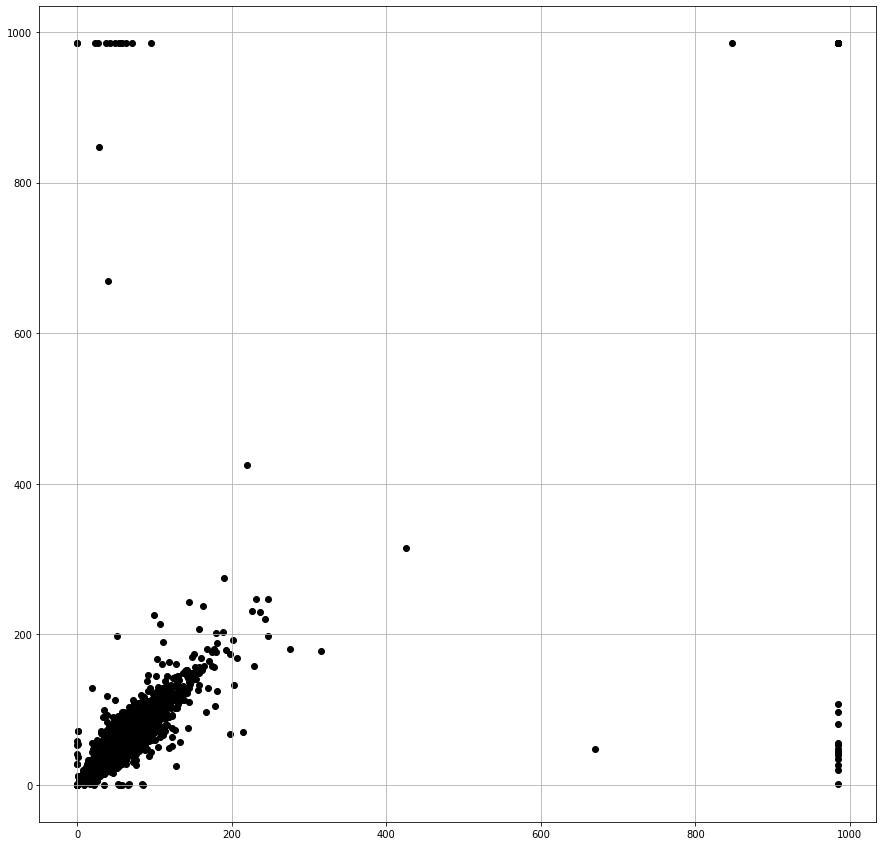

In [60]:
plt.figure(figsize=(15, 15))
plt.grid(True)
plt.scatter(tdf['PM10'], tdf['PM10_res'],  color='black')

plt.show()

In [71]:
tdf['PM10']

4        57
15       46
26       46
37       52
48       60
         ..
96405    88
96418    76
96431    70
96444    69
96457    65
Name: PM10, Length: 8759, dtype: int64

In [82]:
tdf[['PM10', 'PM10_res']]#.dropna(axis=1)

,PM10,PM10_res
4,57,46.0
15,46,46.0
26,46,52.0
37,52,60.0
48,60,49.0
...,...,...
96405,88,76.0
96418,76,70.0
96431,70,69.0
96444,69,65.0


In [86]:
tdf['PM10_res']

4        46.0
15       46.0
26       52.0
37       60.0
48       49.0
         ... 
96405    76.0
96418    70.0
96431    69.0
96444    65.0
96457    56.0
Name: PM10_res, Length: 8759, dtype: float64

In [88]:
X_train, X_test, y_train, y_test = train_test_split(tdf[['PM10']], tdf[['PM10_res']], test_size=0.2, random_state=5)
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.4901230273874179

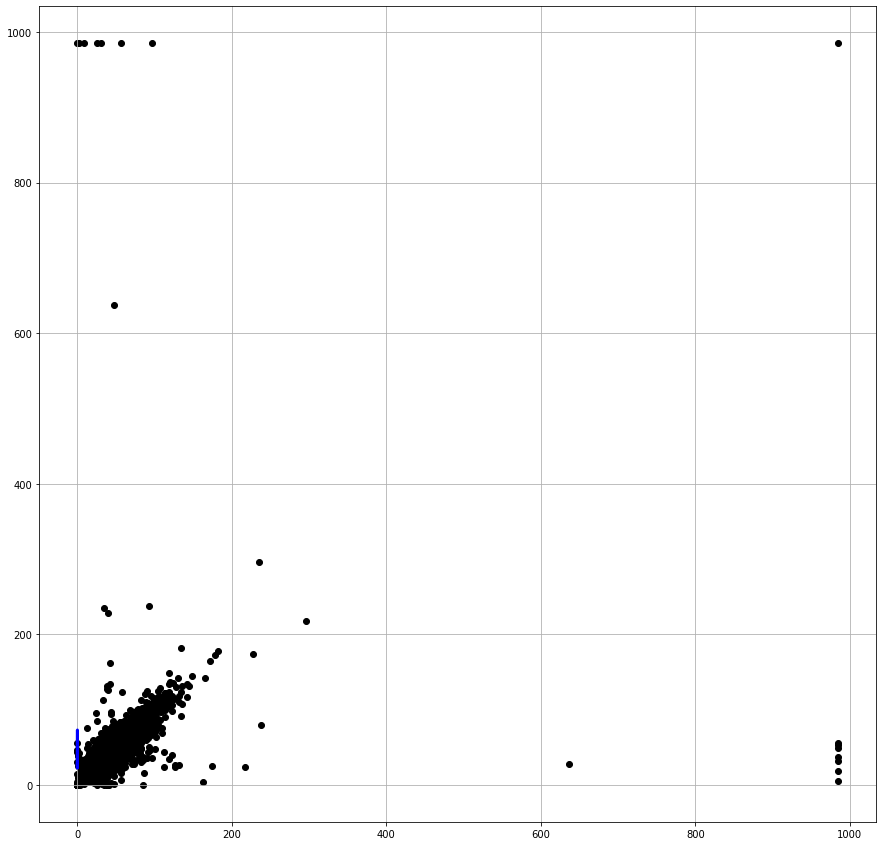

In [144]:
plt.figure(figsize=(15, 15))
plt.grid(True)
plt.scatter(tdf['PM10'], tdf['PM10_res'],  color='black')
plt.plot(X_test, model.predict(X_test), color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [147]:
tdf_outlier_drop = tdf[ (tdf['PM10']<=500) & (tdf['PM10_res']<=500)]

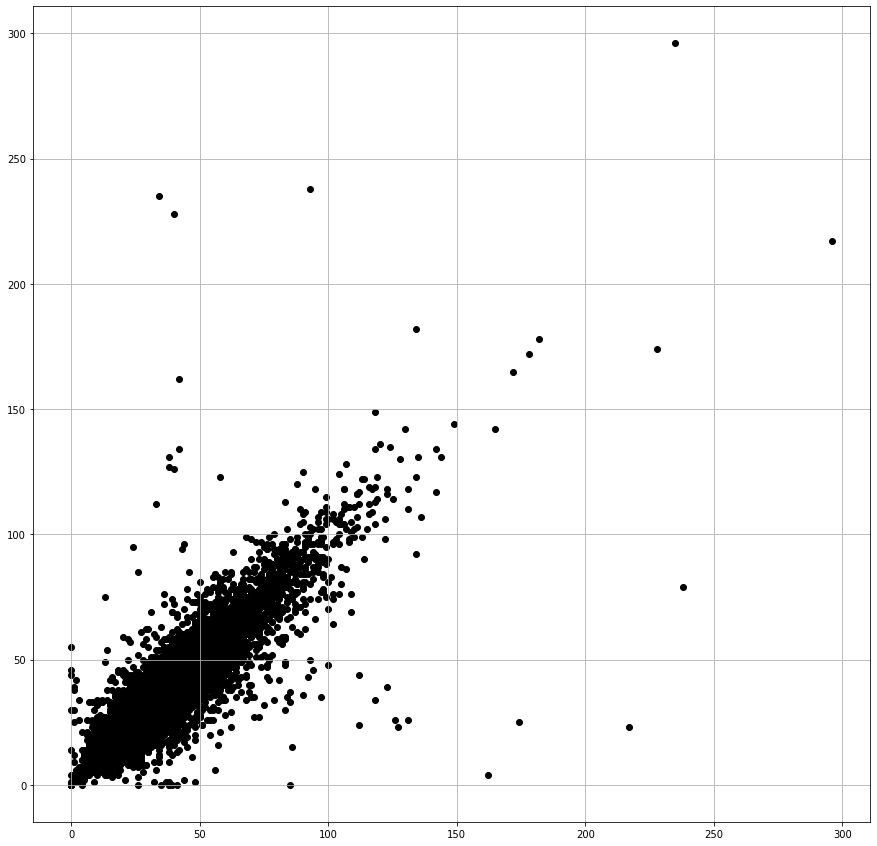

In [148]:
plt.figure(figsize=(15, 15))
plt.grid(True)
plt.scatter(tdf_outlier_drop['PM10'], tdf_outlier_drop['PM10_res'],  color='black')

plt.show()

In [149]:
X_train, X_test, y_train, y_test = train_test_split(tdf_outlier_drop[['PM10']], tdf_outlier_drop[['PM10_res']], test_size=0.2, random_state=5)
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7587266804720862

In [150]:
#X_train, X_test, y_train, y_test = train_test_split(tdf_outlier_drop[['PM10']], tdf_outlier_drop[['PM10_res']], test_size=0.2, random_state=5)
model = LinearRegression(normalize=True)
model.fit(tdf_outlier_drop[['PM10']], tdf_outlier_drop[['PM10_res']])
#model.score(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

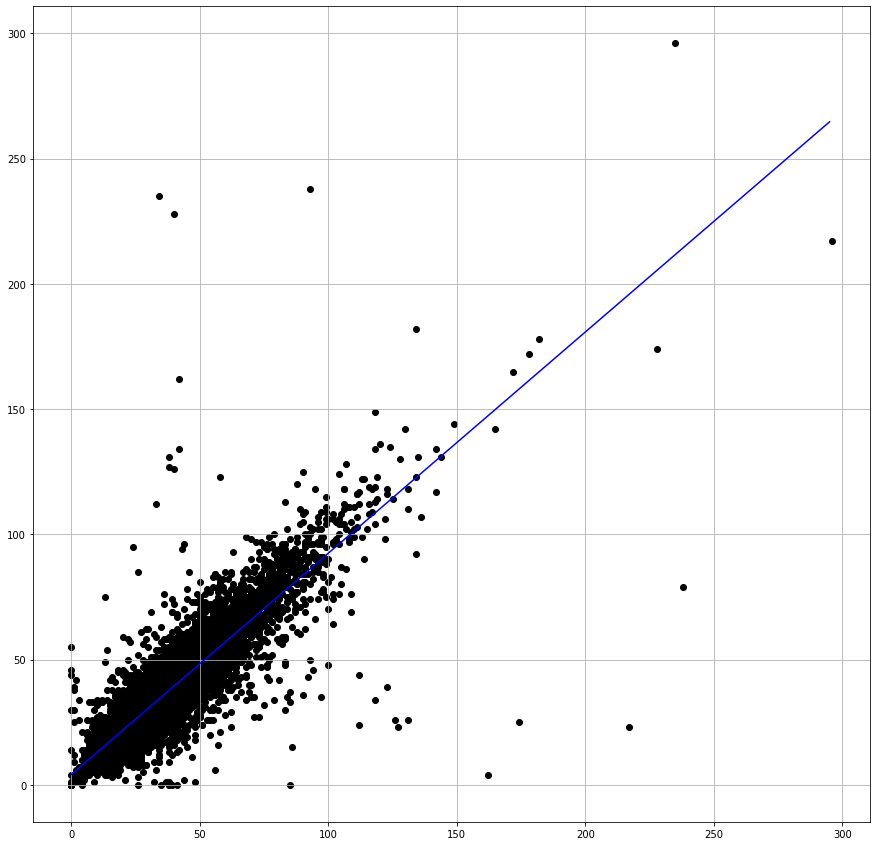

In [151]:
plt.figure(figsize=(15, 15))
plt.grid(True)
plt.scatter(tdf_outlier_drop['PM10'], tdf_outlier_drop['PM10_res'],  color='black')

aran = np.arange(min(tdf_outlier_drop['PM10']) ,max(tdf_outlier_drop['PM10_res']) , 1)
plt.plot(aran, model.predict(aran.reshape(-1, 1)), color='blue')

#plt.xticks(())
#plt.yticks(())

plt.show()

### PM25

#### 아웃라이어 날리기 전

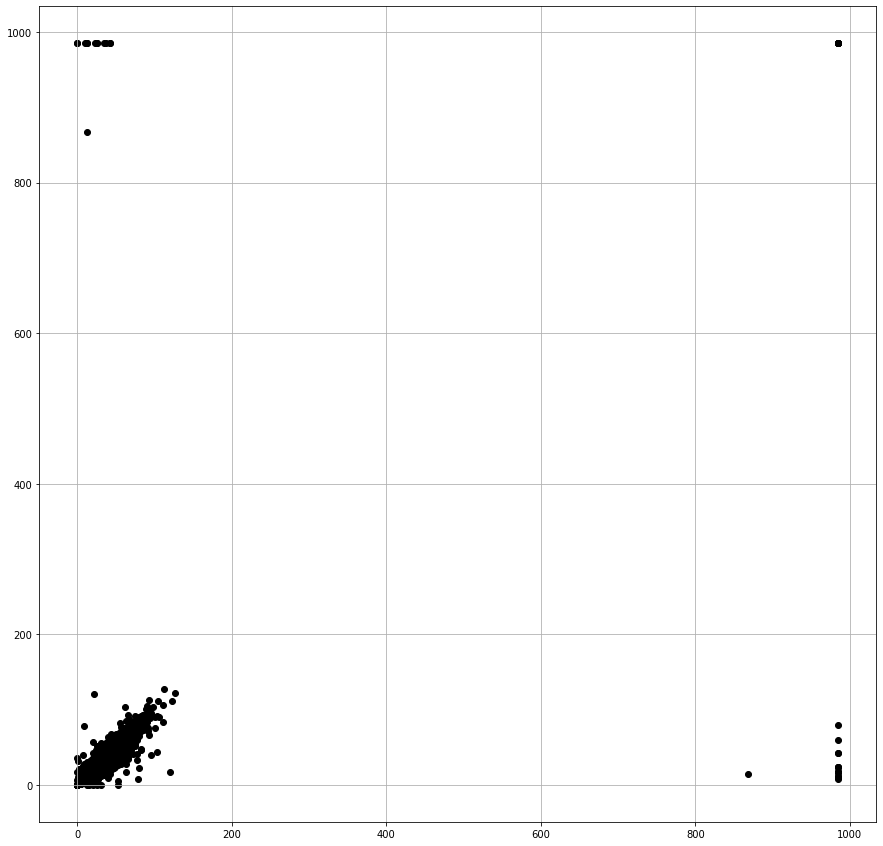

In [115]:
plt.figure(figsize=(15, 15))
plt.grid(True)
plt.scatter(tdf['PM25'], tdf['PM25_res'],  color='black')

plt.show()

In [116]:
X_train, X_test, y_train, y_test = train_test_split(tdf[['PM25']], tdf[['PM25_res']], test_size=0.2, random_state=5)
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.07868464255689056

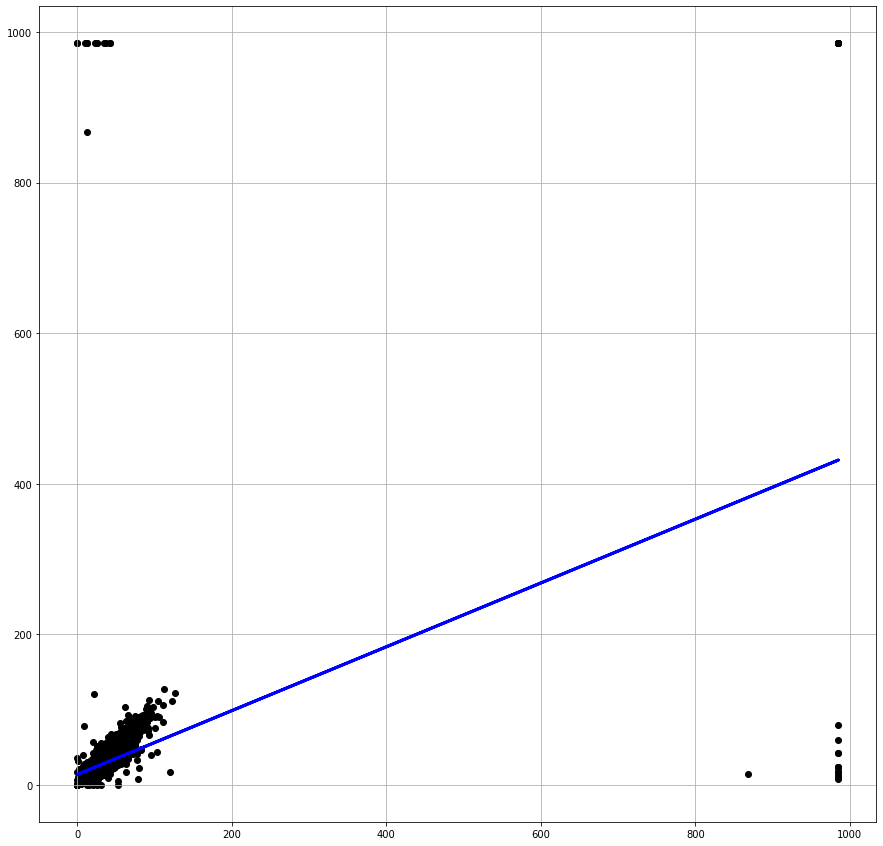

In [117]:
plt.figure(figsize=(15, 15))
plt.grid(True)
plt.scatter(tdf['PM25'], tdf['PM25_res'],  color='black')
plt.plot(X_test, model.predict(X_test), color='blue', linewidth=3)

plt.show()

#### 아웃라이어 날린 후

In [118]:
tdf_outlier_drop = tdf[ (tdf['PM25']<=200) & (tdf['PM25_res']<=200)]

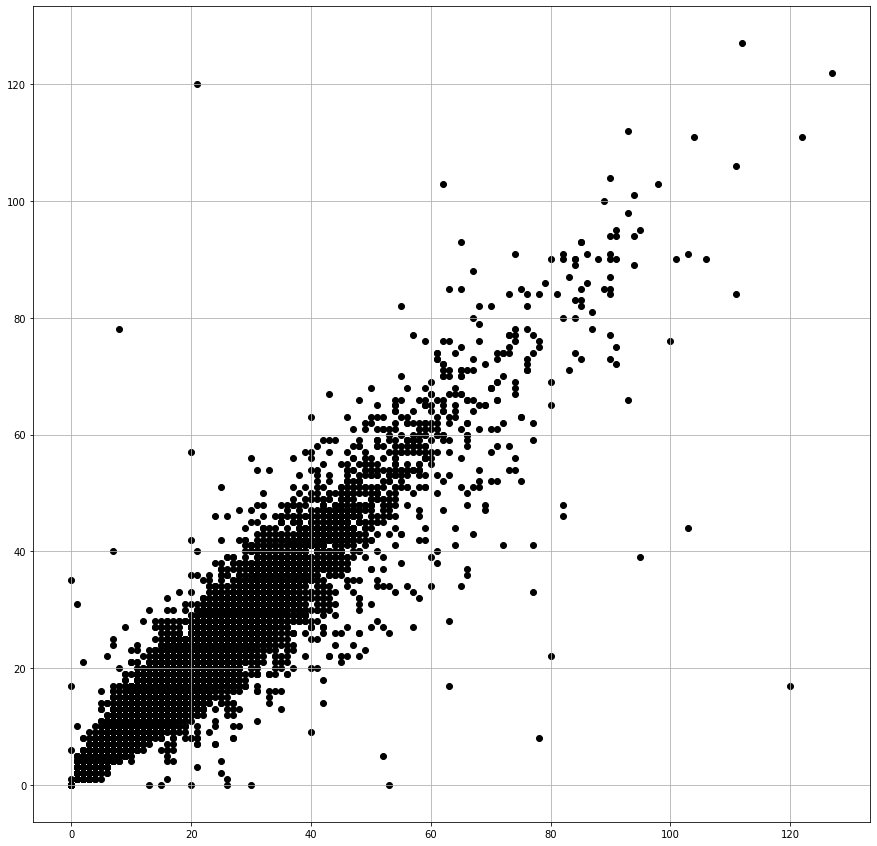

In [120]:
plt.figure(figsize=(15, 15))
plt.grid(True)
plt.scatter(tdf_outlier_drop['PM25'], tdf_outlier_drop['PM25_res'],  color='black')

plt.show()

In [121]:
X_train, X_test, y_train, y_test = train_test_split(tdf_outlier_drop[['PM25']], tdf_outlier_drop[['PM25_res']], test_size=0.2, random_state=5)
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.844546573172195

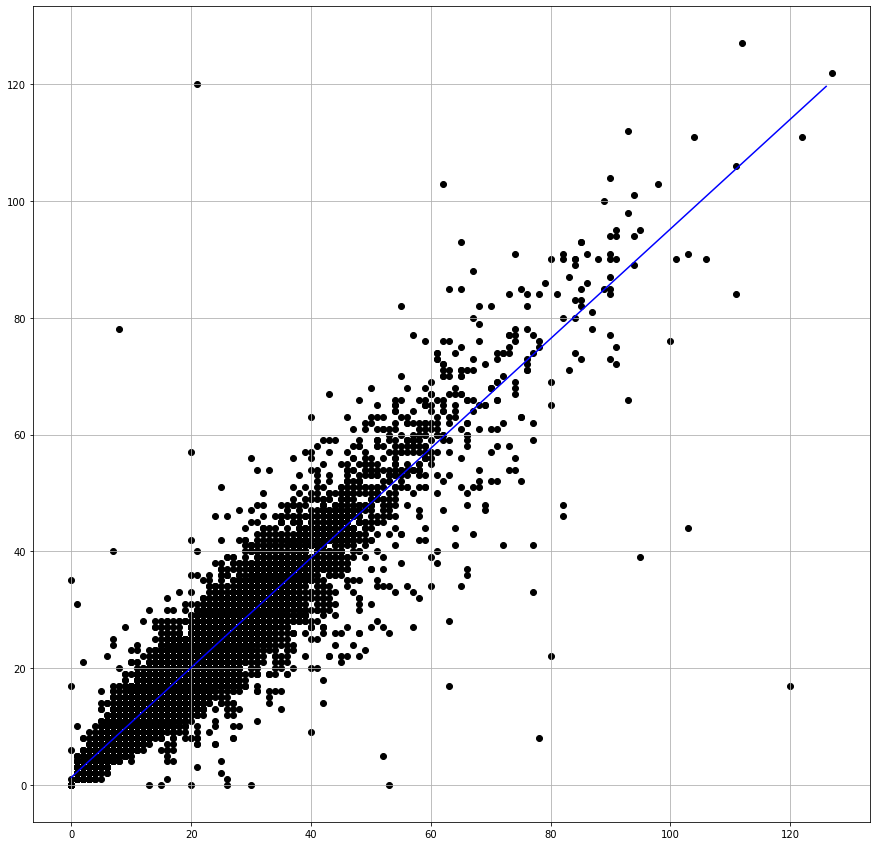

In [122]:
plt.figure(figsize=(15, 15))
plt.grid(True)
plt.scatter(tdf_outlier_drop['PM25'], tdf_outlier_drop['PM25_res'],  color='black')

aran = np.arange(min(tdf_outlier_drop['PM25']) ,max(tdf_outlier_drop['PM25_res']) , 1)
plt.plot(aran, model.predict(aran.reshape(-1, 1)), color='blue')

plt.show()

### 선형회귀 연습

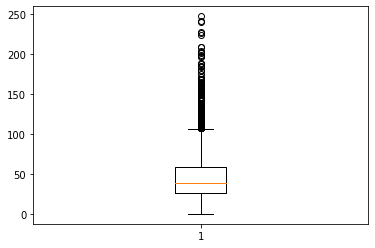

In [ ]:
plt.boxplot(tdf[ (tdf['PM10']<=500) & (tdf['PM10_res']<=500)]['PM10'])

plt.show()

In [ ]:
#max(suchangdong_drop[suchangdong_drop['PM10']<=500])
suchangdong_drop_outlier = suchangdong_drop[ (suchangdong_drop['PM10']<=500) & (suchangdong_drop['PM10_res']<=500)]
suchangdong_drop_outlier

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,0.005,65,45,0.001,0.038,0.9,63.0
11,0.005,63,43,0.002,0.035,0.9,64.0
22,0.006,64,50,0.001,0.034,1.0,68.0
33,0.005,68,53,0.001,0.032,0.9,82.0
44,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...
96401,0.003,76,17,0.020,0.018,0.4,74.0
96414,0.004,74,20,0.018,0.018,0.4,62.0
96427,0.003,62,19,0.016,0.021,0.5,59.0
96440,0.004,59,18,0.020,0.015,0.4,54.0


In [ ]:
X = suchangdong_drop_outlier[['PM10']]#[suchangdong_drop.columns[:-1]]
X

,PM10
0,65
11,63
22,64
33,68
44,82
...,...
96401,76
96414,74
96427,62
96440,59


In [ ]:
y = suchangdong_drop_outlier[['PM10_res']]
y

,PM10_res
0,63.0
11,64.0
22,68.0
33,82.0
44,72.0
...,...
96401,74.0
96414,62.0
96427,59.0
96440,54.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
#X_train.sort_values(by='PM10', ascending=False).head(20)

In [ ]:
model = LinearRegression(normalize=True)

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
model.score(X_test, y_test)

0.8714182695940943

In [ ]:
model.predict(X_test)

array([[41.05531337],
       [42.33688551],
       [38.17177604],
       ...,
       [42.97767159],
       [38.17177604],
       [38.49216907]])

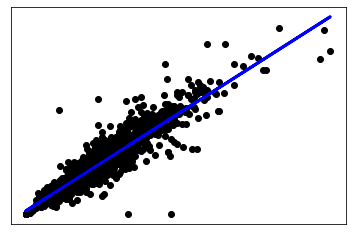

In [ ]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, model.predict(X_test), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
y_test

,PM10_res
74580,23.0
23914,34.0
51458,18.0
91300,20.0
51381,48.0
...,...
35541,41.0
74657,29.0
9647,33.0
78056,26.0


### NO2

In [129]:
X_train, X_test, y_train, y_test = train_test_split(tdf_no2drop[['NO2']], tdf_no2drop[['PM10_res']], test_size=0.2, random_state=5)
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2247283222425026

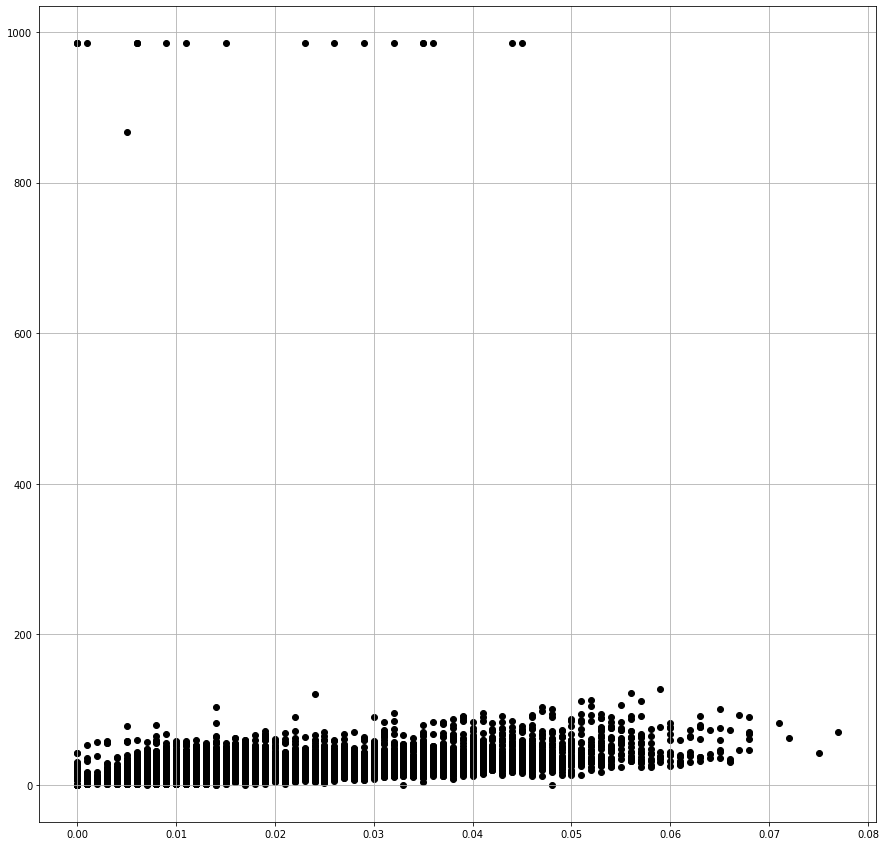

In [125]:
plt.figure(figsize=(15, 15))
plt.grid(True)
plt.scatter(tdf['NO2'], tdf['PM25_res'],  color='black')

plt.show()

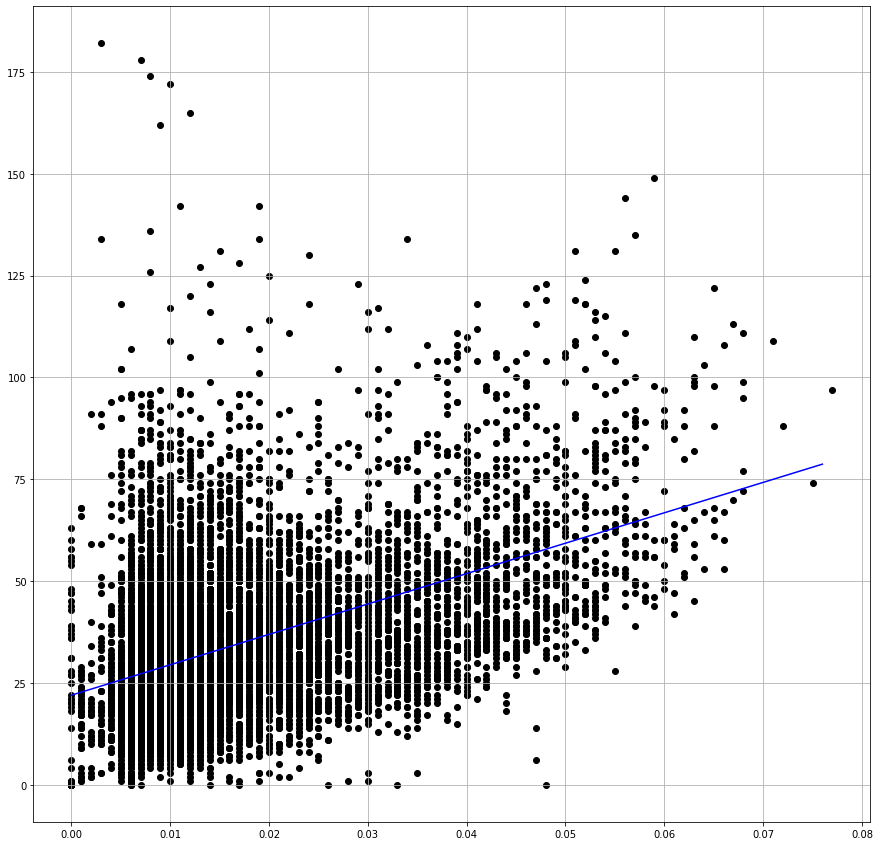

In [136]:
plt.figure(figsize=(15, 15))
plt.grid(True)
plt.scatter(tdf_no2drop['NO2'], tdf_no2drop['PM10_res'],  color='black')

aran = np.arange(min(tdf_no2drop['NO2']) ,max(tdf_no2drop['NO2']) , 0.001)
plt.plot(aran, model.predict(aran.reshape(-1, 1)), color='blue')

plt.show()

#### 딥러닝


In [138]:
import tensorflow as tf

In [208]:
finmodel = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=2, activation='relu', input_shape=(2,)),
                             tf.keras.layers.Dense(units=8, activation='relu'),
                             tf.keras.layers.Dense(units=16, activation='relu'),
                             tf.keras.layers.Dense(units=8, activation='relu'),
                             tf.keras.layers.Dense(units=1),
])
finmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_17 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 319
Trainable params: 319
Non-trainable params: 0
_________________________________________________________________


In [209]:
finmodel.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='mse')

In [152]:
tdf_outlier_drop_deep = tdf[ (tdf['PM10']<=200) & (tdf['PM10_res']<=200)]

In [154]:
from sklearn import preprocessing

In [155]:
minmaxscaler = preprocessing.MinMaxScaler()

In [206]:
deepx = tdf_outlier_drop_deep[['NO2', 'PM10']] #minmaxscaler.fit_transform(tdf_outlier_drop_deep[['NO2', 'PM10']])
deepy = tdf_outlier_drop_deep[['PM10_res']] #minmaxscaler.fit_transform(tdf_outlier_drop_deep[['PM10_res']])

In [207]:
X_train, X_test, y_train, y_test = train_test_split(deepx, deepy, test_size=0.2, random_state=5)

In [244]:
y_mean/y_std

PM10_res    1.633492
dtype: float64

In [211]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train -= X_mean
X_train /= X_std
X_test -= X_mean
X_test /= X_std

y_mean = y_train.mean(axis=0)
y_std = y_train.std(axis=0)
y_train -= y_mean
y_train /= y_std
y_test -= y_mean
y_test /= y_std

print(X_train, y_train)

            NO2      PM10
71143  0.401343 -1.124073
13107 -0.501679  0.467130
65379 -0.727434  0.045929
26626 -0.050168  0.233130
4065   1.755875 -0.094471
...         ...       ...
80339  1.078609 -0.141271
33534 -0.426427 -0.047671
44963  0.627098  0.794731
24800  2.884652  1.122332
32093 -0.802686 -0.188071

[6987 rows x 2 columns]        PM10_res
71143 -1.029215
13107 -0.146041
65379 -0.099559
26626  0.597684
4065   0.132856
...         ...
80339  0.272304
33534 -0.006593
44963  0.923064
24800  1.155478
32093 -0.239007

[6987 rows x 1 columns]


In [212]:
history = finmodel.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')])

Epoch 1/100
175/175 [==============================] - 0s 3ms/step - loss: 5.7002 - val_loss: 0.5475
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 0.5868 - val_loss: 0.4512
Epoch 3/100
175/175 [==============================] - 0s 1ms/step - loss: 0.5171 - val_loss: 0.4079
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4445 - val_loss: 0.3218
Epoch 5/100
175/175 [==============================] - 0s 1ms/step - loss: 0.3646 - val_loss: 0.2643
Epoch 6/100
175/175 [==============================] - 0s 1ms/step - loss: 0.3186 - val_loss: 0.2337
Epoch 7/100
175/175 [==============================] - 0s 1ms/step - loss: 0.2902 - val_loss: 0.2121
Epoch 8/100
175/175 [==============================] - 0s 1ms/step - loss: 0.2699 - val_loss: 0.1959
Epoch 9/100
175/175 [==============================] - 0s 1ms/step - loss: 0.2543 - val_loss: 0.1887
Epoch 10/100
175/175 [==============================] - 0s 1ms/step - loss: 0.2447 - val_lo

In [213]:
y_pred = finmodel.predict(X_test)
u = ((y_test - y_pred) ** 2).sum()
v = ((y_test - y_test.mean()) ** 2).sum()
R = 1 - (u / v)
R

PM10_res    0.759573
dtype: float64

In [188]:
pd.DataFrame(X_test)

,0,1
0,0.038961,0.181319
1,0.805195,0.329670
2,0.168831,0.186813
3,0.220779,0.219780
4,0.129870,0.197802
...,...,...
1742,0.337662,0.219780
1743,0.129870,0.258242
1744,0.259740,0.263736
1745,0.129870,0.098901


In [194]:
X_test.reshape(1,2, -1)

array([[[0.03896104, 0.18131868, 0.80519481, ..., 0.14285714,
         0.25824176, 0.27272727],
        [0.12087912, 0.1038961 , 0.15934066, ..., 0.0989011 ,
         0.18181818, 0.13186813]]])

In [205]:
line_y

array([[0.19277386],
       [0.19277386],
       [0.19277386],
       ...,
       [0.19277386],
       [0.19277386],
       [0.19277386]], dtype=float32)

In [215]:
X_test

,NO2,PM10
76698,-1.103693,-0.094471
91823,3.336162,1.169132
32412,-0.351175,-0.047671
27748,-0.050168,0.233130
34975,-0.576930,0.045929
...,...,...
1689,0.627098,0.233130
30553,-0.576930,0.560731
26769,0.175587,0.607531
35657,-0.576930,-0.796473


In [221]:
line_y

array([[-0.08350003],
       [ 1.8115971 ],
       [ 0.02647096],
       ...,
       [ 0.62481815],
       [-0.6332194 ],
       [-0.36569476]], dtype=float32)

In [ ]:
y_test -= y_mean
y_test /= y_std

In [224]:
y_std

PM10_res    21.513318
dtype: float64

In [223]:
line_y*y_std#+y_mean

ValueError: ignored

In [228]:
deepy

,PM10_res
6,46.0
17,40.0
28,40.0
39,37.0
50,45.0
...,...
96407,62.0
96420,55.0
96433,54.0
96446,56.0


In [230]:
deepy#.reset_index()

,PM10_res
6,46.0
17,40.0
28,40.0
39,37.0
50,45.0
...,...
96407,62.0
96420,55.0
96433,54.0
96446,56.0


In [236]:
deepy

,PM10_res
6,46.0
17,40.0
28,40.0
39,37.0
50,45.0
...,...
96407,62.0
96420,55.0
96433,54.0
96446,56.0


In [246]:
deepx

,NO2,PM10
6,0.037,50
17,0.034,46
28,0.031,40
39,0.030,40
50,0.029,37
...,...,...
96407,0.014,66
96420,0.017,62
96433,0.016,55
96446,0.023,54


In [247]:
deepx_nor = deepx.copy()
deepx_nor -= X_mean
deepx_nor /= X_std

In [237]:
#deepy_mean = deepy.mean(axis=0)
#deepy_std = deepy.std(axis=0)
deepy_nor = deepy.copy()
deepy_nor -= y_mean
deepy_nor /= y_std

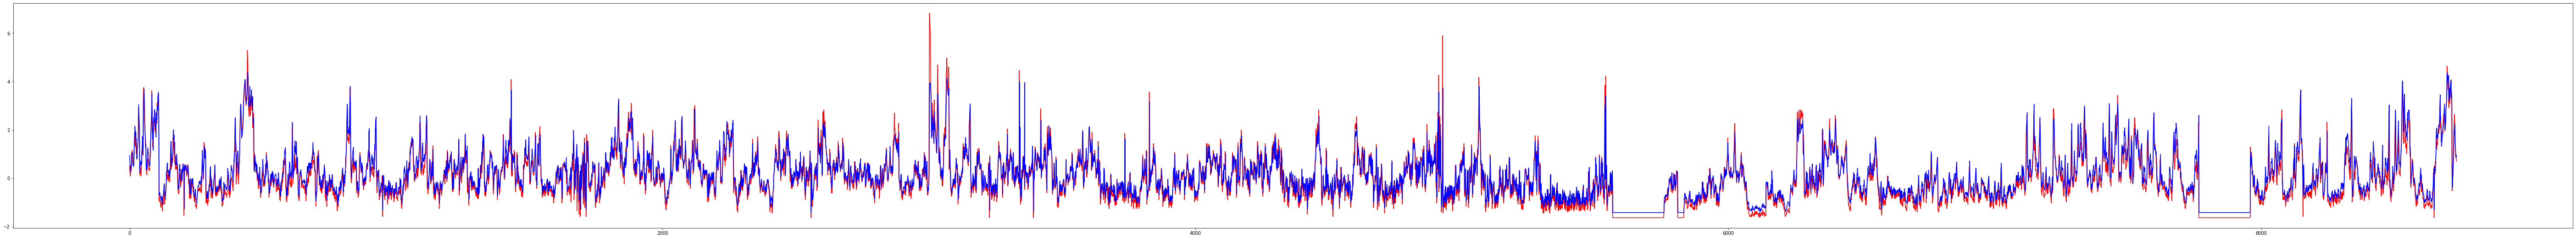

In [248]:
plt.figure(figsize=(100, 9))
plt.plot(deepy.reset_index().index, deepy_nor.reset_index()['PM10_res'], color='red')
plt.plot(deepy.reset_index().index, finmodel.predict(deepx_nor), color='blue',)

plt.show()

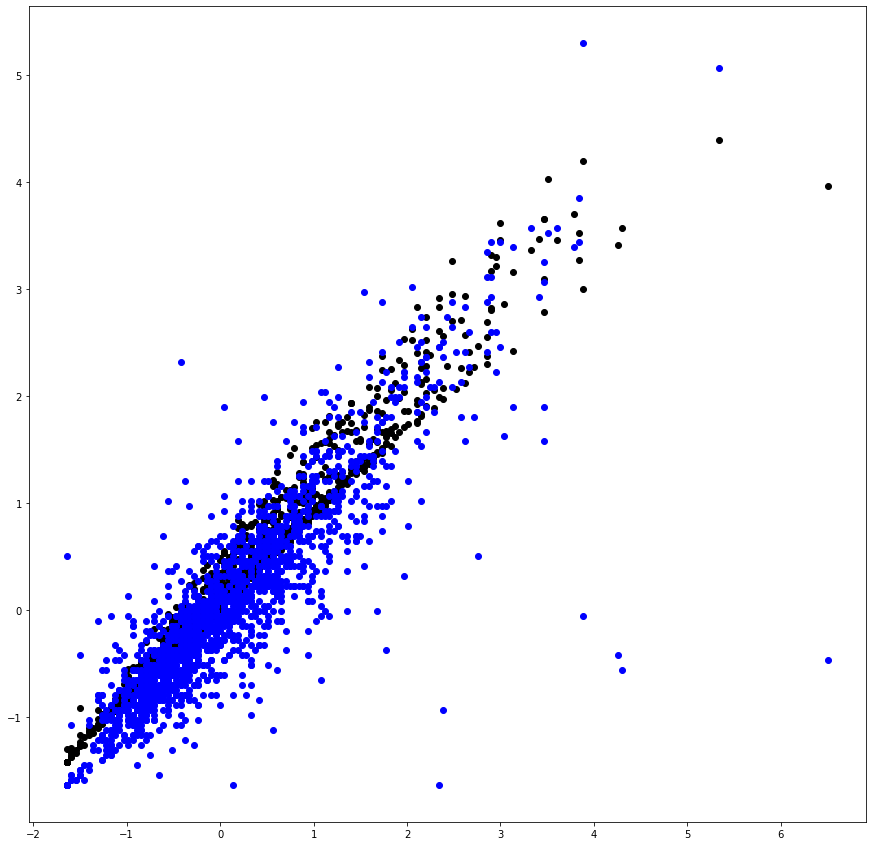

In [226]:
plt.figure(figsize=(15, 15))
line_x = pd.DataFrame(X_test)['PM10']
line_y=finmodel.predict(X_test)

plt.plot(pd.DataFrame(X_test)['PM10'], y_test, 'bo')
plt.scatter(line_x, line_y, color='black')

plt.show()

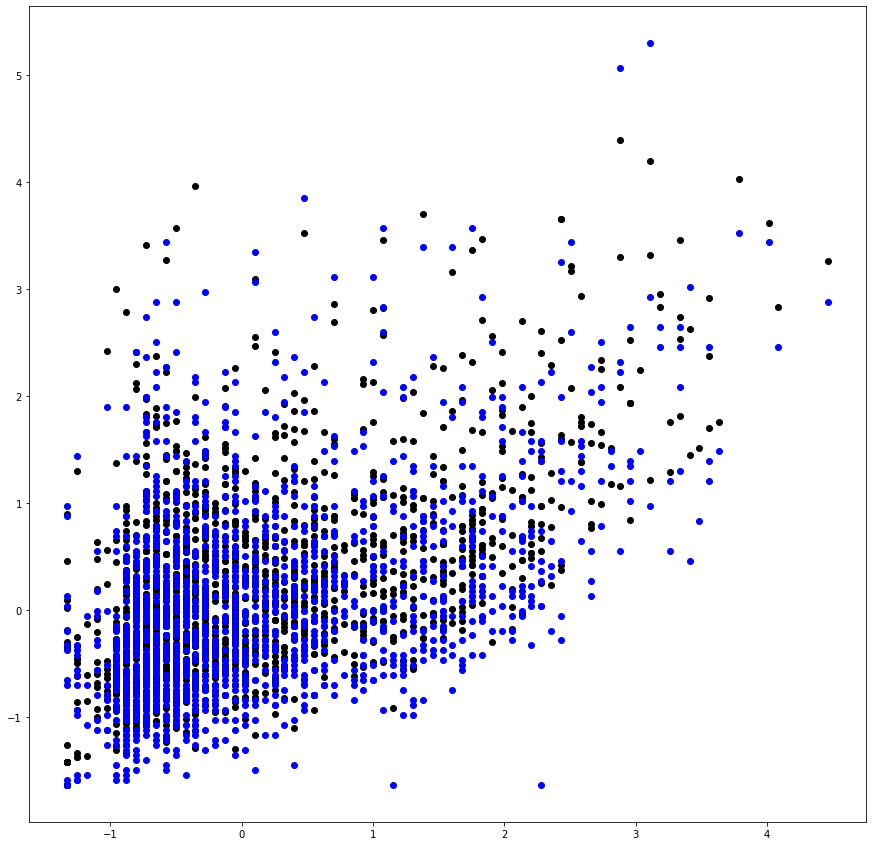

In [225]:
plt.figure(figsize=(15, 15))
line_x = pd.DataFrame(X_test)['NO2']
line_y=finmodel.predict(X_test)

plt.plot(pd.DataFrame(X_test)['NO2'], y_test, 'bo')
plt.scatter(line_x, line_y, color='black')

plt.show()